<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/Project3FINALVERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<div align="right"> April 2, 2023 </div>**

# Project 3: Solving Non-Linear Equations

## Aaron Arias Vales, Kennedy Thomas
#### CPSMA 4413 -- Dr. Jacob

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### *Part 1: Newton-Raphson Method*

**We begin by creating a function with a degree $n>2$. The function we have chosen is $f(x) = 3x^4+7x^3-17$.   
The Newton Raphson Method requires that we also have the derivative of our function, so we find $f'(x) = 12x^3+21x^2$.**

#### FUNCTION DEFINITIONS 

In [ ]:
def f(x):
    y = 3*x**4 + 7*x**3 - 17 
    return y

def fprime(x):
    yprime = 12*x**3 + 21*x**2
    return yprime

def absolute_relative_error(x,x_1):
    epsilon = abs((x_1 - x) / x_1) 
    return epsilon

**The Newton-Raphson Method of finding roots of a polynomial is defined as**


\begin{equation*}
x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}
\end{equation*}

**where $x_{i}$ is our initial guess for the root of $f(x)$ at $f(x_{i})$. Our goal is to get within $.01\%$ of our true $x$ value where $f(x)=0$. We use the absolute relative error formula,**

\begin{equation*}
|\epsilon_{a}|= \Big|\frac{x_{i+1}-x_{i}}{x_{i+1}}\Big|
\end{equation*}

**to check our error after each iteration.**

In [ ]:
#performs actual calculation inside newton raphson method function when called
def datapoint(x_0):
    x_1 = x_0 - (f(x_0) / fprime(x_0))
    return x_1

In [ ]:
#newton raphson method; n will always be 0, it is our counter for iterations
def newton_raphson(x_0,tol,n):
    x_1 = datapoint(x_0)
    error = absolute_relative_error(x_0,x_1)
    if error <= tol:
        return x_1
    else:
        n+=1
        return newton_raphson(datapoint(x_0),tol,n)

In [ ]:
#returns number of iterations, essentially the same as our N.R. func but returns value for n when complete
def iterations(x_0,tol,n):
    x_1 = datapoint(x_0)
    error = absolute_relative_error(x_0,x_1)
    if error <= tol:
        return n
    else:
        n+=1
        return iterations(datapoint(x_0),tol,n)

**Now that we have the algorithm created, we can start storing some data in tables. Below I have graphed our function and tables storing data describing the efficacy of our algorithm.**

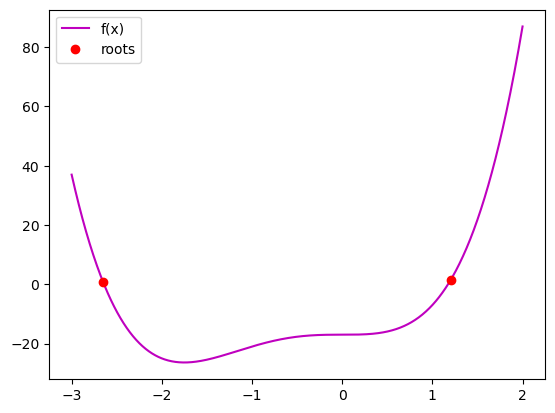

In [ ]:
xf = np.linspace(-3, 2, 1000)
yf = f(xf)
plt.plot(xf,yf,'m',label='f(x)')
plt.plot(xf[70],yf[70],'ro',label='roots')
plt.plot(xf[840],yf[840],'ro')
plt.legend()
plt.show()

#      $f(x)=3x^4+7x^3-17$ for $ x \in [-3,2]$

# Negative Root Estimations

**This table describes the number of iterations at a given initial estimate $x_{0}$ where $x < 0$ for $f(x)=0$.**

In [ ]:
xineg = pd.DataFrame({'root':[newton_raphson(i,.0001,0) for i in range(-11,-1)]})
x0neg = pd.DataFrame({'x_0':[i for i in range(-11,-1)]})
iteration = pd.DataFrame({'iteration count': [iterations(i,.0001,0) for i in range(-11,-1)]})
pd.concat([xineg,x0neg,iteration],axis=1)

,root,x_0,iteration count
0,-2.64097,-11,9
1,-2.64097,-10,9
2,-2.64097,-9,8
3,-2.64097,-8,8
4,-2.64097,-7,7
5,-2.64097,-6,7
6,-2.64097,-5,6
7,-2.64097,-4,5
8,-2.64097,-3,3
9,-2.64097,-2,6


# Positive Root Estimations

**This table describes the number of iterations at a given initial estimate $x_{0}$ where $x > 0$ for $f(x)=0$.**

In [ ]:
xipos = pd.DataFrame({'root':[newton_raphson(i,.0001,0) for i in range(1,11)]})
x0pos = pd.DataFrame({'x_0':[i for i in range(1,11)]})
p_iteration = pd.DataFrame({'iteration count': [iterations(i,.0001,0) for i in range(1,11)]})
pd.concat([xipos,x0pos,p_iteration],axis=1)

,root,x_0,iteration count
0,1.17347,1,3
1,1.17347,2,4
2,1.17347,3,6
3,1.17347,4,7
4,1.17347,5,7
5,1.17347,6,8
6,1.17347,7,8
7,1.17347,8,9
8,1.17347,9,9
9,1.17347,10,10


**From our tables, we can see that as our $x_{0}$ strays from the true root value, it takes more iterations of the algorithm to reach an accurate estimation. This method has its flaws, it would not work well with a non-polynomial function such as $e^x$, whose derivative is itself. However, if we are working with a non-quadratic polynomial function, this method requires less iterations to acquire a guess of the same accuracy than that of the secant method, and only 1 initial seed compared to the secant method's 2 initial seeds.**

### *Part 2: The Secant Method*

**Here we are using the secant method.  the Lagrange interpolation function for $e^x$, defined using the function $L(x)$ with an input of $x$. The main function used to find roots is `secant_method(f, a, b, tol=1e-6, max_iter=100`, which takes as inputs the function to find roots for `(f)`, two initial guesses for the roots (`a` and `b`), a tolerance level for the root estimate (`tol`), and a maximum number of iterations (`max_iter`).The secant method itself is a numerical method for finding roots of a function. It works by starting with two initial guesses (`a` and `b`) for the root and repeatedly improving the guess using the function values at those points to approximate the root location. At each iteration, the secant method computes a new estimate of the root by finding the x-intercept of the line that connects the two previous function evaluations. This process is repeated until the difference between two consecutive estimates is below the tolerance level or the maximum number of iterations is reached.**

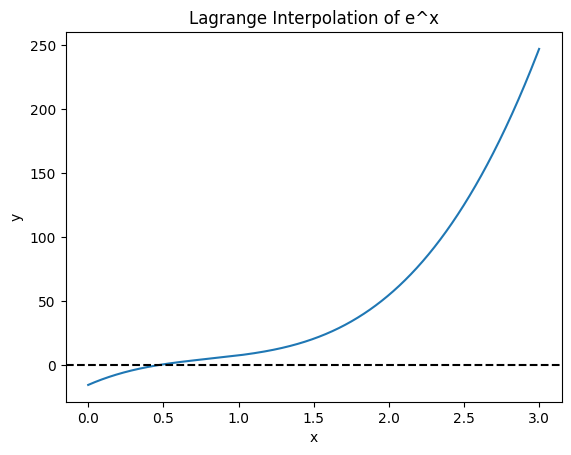

    Root Estimate     Error  Iterations
0        0.294612  2.205388           1
1        0.367168  0.072556           2
2        0.458334  0.091166           3
3        0.476135  0.017801           4
4        0.478370  0.002236           5
..            ...       ...         ...
92       0.441986  0.239459           9
93       0.485760  0.043774          10
94       0.478695  0.007065          11
95       0.478416  0.000279          12
96       0.478418  0.000002          13

[97 rows x 3 columns]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to find roots for
def f(x):
    return L(x) - y

# Define the Lagrange interpolation function for e^x
def L(x):
    x_vals = np.array([center, center+0.1, center+0.2, 2*center])
    y_vals = np.array([np.exp(2*center), np.exp(2*(center+0.1)), np.exp(2*(center+0.2)), np.exp(4*center)])
    n = len(x_vals)
    L = 0
    for i in range(n):
        li = 1
        for j in range(n):
            if j != i:
                li *= (x - x_vals[j])/(x_vals[i] - x_vals[j])
        L += y_vals[i] * li
    return L

# Set the center value and target value y
center = 1
y = 0

# Plot the Lagrange interpolation function
x_vals = np.linspace(0, 3, 1000)
y_vals = L(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation of e^x')
plt.show()

# Define the secant method function
def secant_method(f, a, b, tol=1e-6, max_iter=100):
    root_estimates = []
    errors = []
    iterations = []
    
    for i in range(10):
        # Initialize the x1 and x2 values
        x1, x2 = a, b
        
        # Perform the secant method
        for j in range(max_iter):
            # Compute the new estimate
            x_new = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1))
            
            # Compute the error
            error = abs(x_new - x2)
            
            # Store the results
            root_estimates.append(x_new)
            errors.append(error)
            iterations.append(j+1)
            
            # Check if the error is below the tolerance
            if error < tol:
                break
                
            # Update the values
            x1 = x2
            x2 = x_new
        
        # Update the endpoints for the next iteration
        a += 0.5
        b += 0.5
        
    # Create the results table
    results_table = pd.DataFrame({
        'Root Estimate': root_estimates,
        'Error': errors,
        'Iterations': iterations
    })
    
    return results_table

# Apply the secant method to the Lagrange interpolation function
a = 0.1
b = 2.5
results_table = secant_method(f, a, b, tol=1e-4, max_iter=1000)

# Print the results table
print(results_table)


**The  algorithm we used, is using the secant method to find roots of a function, while the Newton-Raphson method uses the derivative of the function to iteratively improve the root estimate. The secant method requires two initial guesses to start with, whereas the Newton-Raphson method only requires one initial guess. The secant method is a slightly slower converging method compared to the Newton-Raphson method, but it is more robust to some types of functions where the derivative is not easily computable or if the function has a singularity or a sharp bend.**

**In the case of the Lagrange interpolation, we do not know the derivative of the function, so the Newton-Raphson method may not be appropriate. In fact, the Lagrange interpolation is a polynomial approximation method, which uses a set of known data points to interpolate a function. It can be used to estimate the value of the function at any point within the range of the data points. Therefore, the secant method can be used to find roots of the interpolated function. However, it is important to note that the accuracy of the interpolated function depends on the number and distribution of the data points used in the interpolation.**